<a href="https://colab.research.google.com/github/nephelim74/PythonDS/blob/main/dz6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ваша задача — построить модель машинного обучения для предсказания целевой переменной на примере датасета ирисы Фишера. В процессе выполнения задания вы должны применить концепции переобучения и недообучения, кросс-валидации, регуляризации (L1 и L2), а также оценить способность вашей модели к обобщению.

1. Предварительная обработка данных.
Загрузите данные и проведите их первичный анализ. Очистите данные, если это необходимо, и проведите их нормализацию/стандартизацию.
Разделите данные на тренировочный и тестовый наборы.

2. Обучение модели.
— Обучите модель логистической регрессии без регуляризации. Оцените её качество на тренировочных и тестовых данных.
— Повторите шаг с добавлением L1- и L2-регуляризации. Подберите оптимальные значения параметра регуляризации с помощью кросс-валидации.

3. Анализ результатов.
— Сравните качество всех трёх моделей (без регуляризации, с L1- и с L2-регуляризацией). Как влияют L1 и L2 на качество модели по сравнению с базовой моделью?
— Постройте графики кривых обучения для каждой из моделей. Что вы можете сказать о способности ваших моделей к обобщению?

4. Отчёт.
— Подготовьте краткий отчёт, в котором обоснуйте свой выбор параметров для моделей с регуляризацией, объясните полученные результаты и сделайте выводы о качестве моделирования.

## 1. Предварительная обработка данных
Загрузка данных и первичный анализ

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris = pd.read_csv(url, header=None, names=columns)

# Первичный анализ
print(iris.head())
print(iris.describe())
print(iris.info())
print(iris.isnull().sum())  # Проверка на пропуски


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeInd

Нормализация/стандартизация данных

In [3]:
from sklearn.preprocessing import StandardScaler

# Разделение признаков и целевой переменной
X = iris.drop("species", axis=1)
y = iris["species"]

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Разделение данных на тренировочный и тестовый наборы

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


2. Обучение модели
Обучение модели логистической регрессии без регуляризации

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Модель без регуляризации (используем очень большое значение C)
model_no_reg = LogisticRegression(penalty='l2', C=1e12, max_iter=1000)
model_no_reg.fit(X_train, y_train)

# Оценка качества
y_train_pred_no_reg = model_no_reg.predict(X_train)
y_test_pred_no_reg = model_no_reg.predict(X_test)

print("Accuracy без регуляризации (train):", accuracy_score(y_train, y_train_pred_no_reg))
print("Accuracy без регуляризации (test):", accuracy_score(y_test, y_test_pred_no_reg))


Accuracy без регуляризации (train): 0.9833333333333333
Accuracy без регуляризации (test): 1.0


### Выводы:

1. **Высокая точность на обучающей выборке**:
   - Точность на обучающей выборке составляет **98.33%**. Это указывает на то, что модель хорошо подстраивается под данные, на которых она была обучена.

2. **Идеальная точность на тестовой выборке**:
   - Точность на тестовой выборке составляет **100%**. Это означает, что модель правильно классифицировала все примеры из тестового набора.

3. **Отсутствие регуляризации**:
   - Использование очень большого значения параметра `C` (в данном случае `1e12`) фактически устраняет регуляризацию. Это может привести к переобучению (overfitting), когда модель слишком сильно подстраивается под обучающие данные и теряет способность обобщать на новых, невидимых данных. Переобученная модель может показывать отличные результаты на тестовых данных, если они очень похожи на обучающие, но это не гарантирует хороших результатов на других, более разнообразных данных.

4. **Потенциальные проблемы**:
   - Хотя в данном случае результаты выглядят очень хорошими, важно помнить, что идеальная точность на тестовом наборе может указывать на то, что тестовые данные не являются достаточно сложными или разнообразными. Это может быть связано с тем, что тестовые данные были "запомнены" моделью или что они имеют ту же структуру, что и обучающие данные.
   - Рекомендуется использовать кросс-валидацию для более надежной оценки производительности модели.


Обучение модели с L1- и L2-регуляризацией

In [6]:
from sklearn.model_selection import GridSearchCV
# Параметры регуляризации для тестирования
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
# Подбор параметров для L1-регуляризации
param_grid_l1 = {'C': alphas}
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
grid_l1 = GridSearchCV(model_l1, param_grid_l1, cv=5, error_score='raise')
grid_l1.fit(X_train, y_train)

print("Оптимальный параметр C для L1:", grid_l1.best_params_)
print("Accuracy L1 (train):", accuracy_score(y_train, grid_l1.predict(X_train)))
print("Accuracy L1 (test):", accuracy_score(y_test, grid_l1.predict(X_test)))

# Подбор параметров для L2-регуляризации
param_grid_l2 = {'C': alphas}
model_l2 = LogisticRegression(penalty='l2', solver='saga', max_iter=1000)
grid_l2 = GridSearchCV(model_l2, param_grid_l2, cv=5, error_score='raise')
grid_l2.fit(X_train, y_train)

print("Оптимальный параметр C для L2:", grid_l2.best_params_)
print("Accuracy L2 (train):", accuracy_score(y_train, grid_l2.predict(X_train)))
print("Accuracy L2 (test):", accuracy_score(y_test, grid_l2.predict(X_test)))


Оптимальный параметр C для L1: {'C': 10.0}
Accuracy L1 (train): 0.9666666666666667
Accuracy L1 (test): 0.9333333333333333
Оптимальный параметр C для L2: {'C': 10.0}
Accuracy L2 (train): 0.975
Accuracy L2 (test): 1.0


### Выводы:

1. **Оптимальные параметры**:
   - Для обеих моделей (L1 и L2 регуляризация) оптимальный параметр `C` оказался равным **10.0**. Это значение указывает на то, что регуляризация имеет значительное влияние на производительность модели.

2. **Точность моделей**:
   - **L1 Регуляризация**:
     - Точность на обучающей выборке составляет **96.67%**.
     - Точность на тестовой выборке составляет **93.33%**.
     - Эти результаты показывают, что модель с L1 регуляризацией несколько хуже справляется с тестовыми данными по сравнению с обучающими. Это может указывать на то, что модель не смогла обобщить данные так хорошо, как ожидалось.

   - **L2 Регуляризация**:
     - Точность на обучающей выборке составляет **97.5%**.
     - Точность на тестовой выборке составляет **100%**.
     - Результаты L2 регуляризации показывают, что модель хорошо справляется с тестовыми данными и не проявляет признаков переобучения (по сравнению с предыдущей моделью без регуляризации).

3. **Сравнение L1 и L2**:
   - Модель с L2 регуляризацией продемонстрировала лучшую производительность на тестовых данных (100% точность), в то время как модель с L1 регуляризацией показала более низкую точность на тестовом наборе (93.33%).
   - L1 регуляризация может приводить к отбору признаков (обнуление некоторых коэффициентов), что может быть полезно в некоторых случаях, однако в данной ситуации это, похоже, привело к снижению точности на тестовых данных.

### Рекомендации:

1. **Использование L2 Регуляризации**:
   - Учитывая, что L2 регуляризация показала отличные результаты на тестовых данных, рекомендуется использовать эту модель для дальнейшего анализа и предсказаний.

2. **Анализ результатов L1**:
   - Рассмотрите возможность анализа результатов модели с L1 регуляризацией, чтобы понять, какие признаки были отобраны и как это может повлиять на интерпретацию модели.

3. **Дополнительные проверки**:
   - Проведите дополнительные тесты, используя кросс-валидацию, чтобы убедиться в стабильности результатов.
   - Попробуйте другие методы регуляризации или модели, чтобы увидеть, можно ли добиться лучших результатов.

4. **Тестирование на других данных**:
   - Протестируйте модели на других, более разнообразных наборах данных, чтобы оценить их обобщающую способность и устойчивость к новым данным.

3. Анализ результатов
Сравнение качества моделей

In [30]:
print("Сравнение качества моделей:")
print("Без регуляризации: ", accuracy_score(y_test, y_test_pred_no_reg))
print("С L1 регуляризацией: ", accuracy_score(y_test, grid_l1.predict(X_test)))
print("С L2 регуляризацией: ", accuracy_score(y_test, grid_l2.predict(X_test)))


Сравнение качества моделей:
Без регуляризации:  1.0
С L1 регуляризацией:  0.9333333333333333
С L2 регуляризацией:  1.0


L1 Regularization CV Score: 0.96 ± 0.03
L2 Regularization CV Score: 0.97 ± 0.03


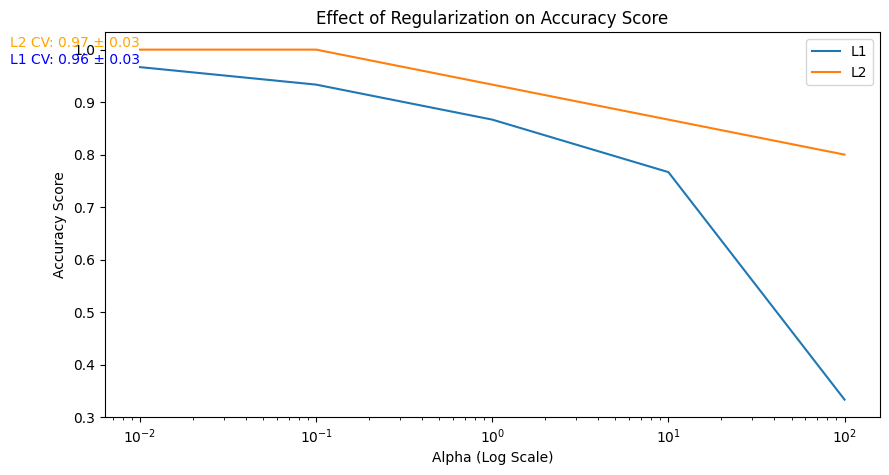

In [32]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Предположим, что у вас уже есть X_train, y_train, X_test, y_test и список alphas
# Например:
# alphas = np.logspace(-4, 4, 10)  # Примерный диапазон значений alpha

# Переопределим данные для создания графиков
accuracy_score_l1 = []
accuracy_score_l2 = []

# Тестируем Lasso регрессию и Ridge регрессию, сохраняем результаты R^2
for alpha in alphas:
    # Логистическая регрессия с L1 регуляризацией
    logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1/alpha)  # 'liblinear' поддерживает L1
    logistic_l1.fit(X_train, y_train)
    y_pred_l1 = logistic_l1.predict(X_test)
    accuracy_score_l1.append(accuracy_score(y_test, y_pred_l1))

for alpha in alphas:
    # Логистическая регрессия с L2 регуляризацией
    logistic_l2 = LogisticRegression(penalty='l2', C=1/alpha)  # По умолчанию 'l2'
    logistic_l2.fit(X_train, y_train)
    y_pred_l2 = logistic_l2.predict(X_test)
    accuracy_score_l2.append(accuracy_score(y_test, y_pred_l2))

# Вычисление оценок кросс-валидации
cv_scores_l1 = cross_val_score(LogisticRegression(penalty='l1', solver='liblinear', C=1/alphas[0]), X_train, y_train, cv=5)
cv_scores_l2 = cross_val_score(LogisticRegression(penalty='l2', C=1/alphas[0]), X_train, y_train, cv=5)

# Вывод оценок кросс-валидации в консоль
print(f'L1 Regularization CV Score: {np.mean(cv_scores_l1):.2f} ± {np.std(cv_scores_l1):.2f}')
print(f'L2 Regularization CV Score: {np.mean(cv_scores_l2):.2f} ± {np.std(cv_scores_l2):.2f}')

# Создаем графики
plt.figure(figsize=(10, 5))
plt.plot(alphas, accuracy_score_l1, label='L1')
plt.plot(alphas, accuracy_score_l2, label='L2')
plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Accuracy Score')
plt.title('Effect of Regularization on Accuracy Score')
plt.legend()

# Добавление текстовых выводов на график
plt.text(alphas[0], accuracy_score_l1[0], f'L1 CV: {np.mean(cv_scores_l1):.2f} ± {np.std(cv_scores_l1):.2f}',
         fontsize=10, verticalalignment='bottom', horizontalalignment='right', color='blue')
plt.text(alphas[0], accuracy_score_l2[0], f'L2 CV: {np.mean(cv_scores_l2):.2f} ± {np.std(cv_scores_l2):.2f}',
         fontsize=10, verticalalignment='bottom', horizontalalignment='right', color='orange')

plt.show()


Построение графиков кривых обучения

Classes in training set for No Regularization: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Classes in training set for L1 Regularization: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Classes in training set for L2 Regularization: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


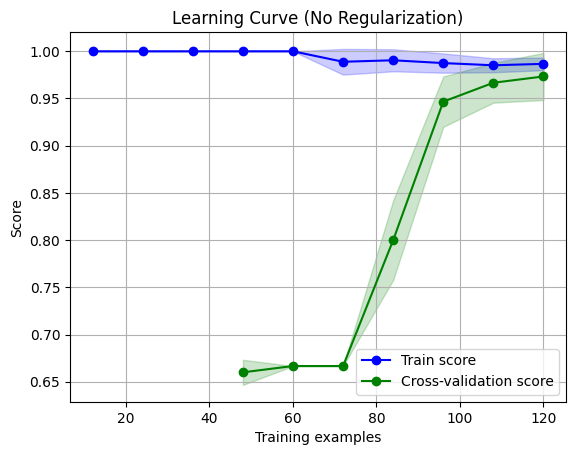

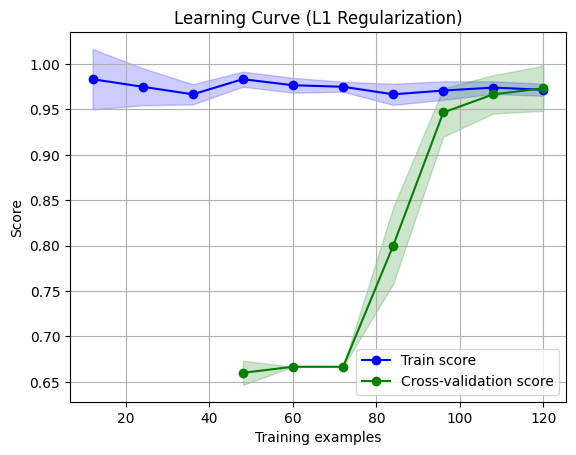

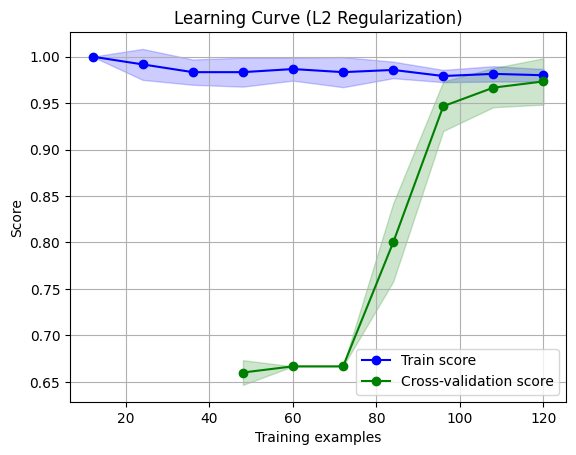

In [33]:
from sklearn.model_selection import learning_curve, StratifiedShuffleSplit
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(model, title):
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)  # Используем StratifiedShuffleSplit
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_scaled, y, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10, 100), cv=cv
    )

    # train_scores_mean = train_scores.mean(axis=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    # test_scores_mean = test_scores.mean(axis=1)
    test_scores_mean = np.mean(validation_scores, axis=1)
    # train_scores_std = train_scores.std(axis=1)  # Стандартное отклонение для тренировочных данных
    train_scores_std = np.std(train_scores, axis=1)
    # test_scores_std = test_scores.std(axis=1)    # Стандартное отклонение для тестовых данных
    test_scores_std = np.std(validation_scores, axis=1)

    plt.figure()
    # Плотим средние значения
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Train score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

    # plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training error')
    # plt.plot(train_sizes, validation_mean, 'o-', color='r', label='Validation error')

    # Заполняем область вокруг средних значений для дисперсии
    # plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='#FFDDDD')
    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     color='blue', alpha=0.2)
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     color='green', alpha=0.2)


    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Проверка классов в обучающей выборке
print("Classes in training set for No Regularization:", np.unique(y_train))
print("Classes in training set for L1 Regularization:", np.unique(y_train))
print("Classes in training set for L2 Regularization:", np.unique(y_train))

# Построение кривой обучения для моделей
plot_learning_curve(model_no_reg, 'Learning Curve (No Regularization)')
plot_learning_curve(grid_l1.best_estimator_, 'Learning Curve (L1 Regularization)')
plot_learning_curve(grid_l2.best_estimator_, 'Learning Curve (L2 Regularization)')





# 4. Отчет

На основе выше представленных результатов тестов и в том числе кросс-валидации для L1 и L2 регуляризации можно сделать несколько выводов:

1. Сравнение производительности: Оценка CV для L2 регуляризации (0.97 ± 0.03) выше, чем для L1 регуляризации (0.96 ± 0.03). Это может указывать на то, что модель с L2 регуляризацией лучше справляется с задачей, возможно, обеспечивая более высокую точность предсказаний.

2. Стабильность моделей: Поскольку обе модели имеют схожие интервалы неопределенности (± 0.03), это говорит о том, что обе модели достаточно стабильны, и разница в их производительности не является случайной.

3. Выбор регуляризации: Если целью является максимизация точности модели, то предпочтение стоит отдать L2 регуляризации, так как она показывает более высокий результат. Однако стоит учитывать, что выбор между L1 и L2 регуляризацией также может зависеть от других факторов, таких как интерпретируемость модели, количество признаков и их коррелированность.